<a href="https://colab.research.google.com/github/heejvely/python-practice/blob/main/ml_%EB%B6%84%EB%A5%98%ED%8F%89%EA%B0%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

titanic_df = pd.read_csv('/content/drive/MyDrive/빅분기연습/dataset/train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# 일괄 전처리 사용자 함수(null 처리, 불필요 칼럼 삭제, 레이블 인코딩)
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
# Age(평균), Cabin('N'), Embarked('N'), Fare(0)
def fillna(df):
  df['Age'].fillna(df['Age'].mean(), inplace=True)
  df['Cabin'].fillna('N', inplace=True)
  df['Embarked'].fillna('N', inplace=True)
  df['Fare'].fillna(0, inplace=True)
  return df

# 머신러닝 알고리즘에 불필요한 속성 제거
# PassengerId, Name, Ticket(티켓번호)
def drop_features(df):
  df.drop(['PassengerId','Name','Ticket'],axis=1, inplace=True)
  return df

# 레이블 인코딩 수행
# Cabin(선실번호 첫문자만 추출 후 인코딩), Sex(성별), Embarked(중간 정착 항구)
def format_features(df):
  df['Cabin'] = df['Cabin'].str[:1]
  features = ['Cabin', 'Sex','Embarked']
  for feature in features:
    le = LabelEncoder()
    le = le.fit(df[feature])
    df[feature] = le.transform(df[feature])
  return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
  df = fillna(df)
  df = drop_features(df)
  df = format_features(df)
  return df

In [3]:

y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived',axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df,
                                                    test_size = 0.2, random_state=11)
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
accuracy_lr = accuracy_score(y_test, pred)
accuracy_lr

0.8491620111731844

In [4]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)

print(pred_proba[:3])
print()
print(pred.reshape(-1,1)[:3])

[[0.46191519 0.53808481]
 [0.878675   0.121325  ]
 [0.87716185 0.12283815]]

[[1]
 [0]
 [0]]


In [5]:
from sklearn.preprocessing import Binarizer

X = [[1,-1,2],
    [2,0,0],
    [0,1.1,1.2]]
# Binarizer(threshold=  ) : threshold 기준값 보다 같거나 작으면 0, 크면 1을 반환

binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [6]:
custom_threshold = 0.5
print('pred_proba: \n', pred_proba[:5])
print()

# 생존 확률 추출 후 2차원 배열로 변환
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
print('생존확률: \n', pred_proba_1[:5])
print()

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)
custom_predict[:5]

pred_proba: 
 [[0.46191519 0.53808481]
 [0.878675   0.121325  ]
 [0.87716185 0.12283815]
 [0.88263183 0.11736817]
 [0.85515178 0.14484822]]

생존확률: 
 [[0.53808481]
 [0.121325  ]
 [0.12283815]
 [0.11736817]
 [0.14484822]]



array([[1.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [9]:
# get_clf_eval 평가 사용자 정의 함수
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def get_clf_eval(y_test,pred):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)
  print('오차 행렬')
  print(confusion)
  print(f'정확도:{accuracy:.4f}, 정밀도:{precision:.4f}, 재현율:{recall:.4f}, F1:{f1:.4f}')

get_clf_eval(y_test, custom_predict)

오차 행렬
[[104  14]
 [ 13  48]]
정확도:0.8492, 정밀도:0.7742, 재현율:0.7869, F1:0.7805


In [10]:
# 정확도 = (TP + TN) / ( TP + TN + FP + FN)
# 정밀도 = TP / ( TP + FP)
# 재현율 = TP / ( TP + FN)
# F1 = 2 * ( 정밀도 * 재현율) / (정밀도 + 재현율)

print('정확도:', (48 + 104) / (104 + 14+ 13 + 48))
print('정밀도:', 48 / (14 + 48))
print('재현율:', 48 / (13 + 48))
print('f1:', 2 * (48 / (14 + 48))*(48 / (13 + 48))/((48 / (14 + 48))+(48 / (13 + 48))))

정확도: 0.8491620111731844
정밀도: 0.7741935483870968
재현율: 0.7868852459016393
f1: 0.7804878048780488


In [11]:
# 임계값이 커지면 양성 예측이 적어지므로 FP가 적어지고 정밀도가 증가한다.
# 정밀도와 재현율은 Trade-off 관계로 정밀도가 증가하면 재현율은 감소한다
thresholds = [0.4,0.45,0.50,0.55,0.60]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
  # thresholds list 객체내의 값을 차례로 itation하면서 evaluation 수행
  for custom_threshold in thresholds:
    binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
    custom_predict = binarizer.transform(pred_proba_c1)
    print('임계값', custom_threshold)
    get_clf_eval(y_test, custom_predict)
    print()
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1),thresholds)

임계값 0.4
오차 행렬
[[98 20]
 [10 51]]
정확도:0.8324, 정밀도:0.7183, 재현율:0.8361, F1:0.7727

임계값 0.45
오차 행렬
[[103  15]
 [ 12  49]]
정확도:0.8492, 정밀도:0.7656, 재현율:0.8033, F1:0.7840

임계값 0.5
오차 행렬
[[104  14]
 [ 13  48]]
정확도:0.8492, 정밀도:0.7742, 재현율:0.7869, F1:0.7805

임계값 0.55
오차 행렬
[[109   9]
 [ 15  46]]
정확도:0.8659, 정밀도:0.8364, 재현율:0.7541, F1:0.7931

임계값 0.6
오차 행렬
[[112   6]
 [ 16  45]]
정확도:0.8771, 정밀도:0.8824, 재현율:0.7377, F1:0.8036



In [12]:
# 임곗값 변화에 따른 평가 지표 값 : 사이킷런 precision_recall_curve() API
# precision_recall_curve()는 일반적으로 0.10~0.97 정도의 임곗값을 갖는 넘파이 ndarray와
# 이 임곗값에 해당하는 정밀도 및 재현율 값을 담은 넘파이 ndarray를 반환

from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일 때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

# 실제값 데이터 셋과 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('반환된 분류 결정 임계값 배열의 Shape:', thresholds.shape)

# 반환된 임계값 배열 로우가 147건이므로 샘플로 10건만 추출하되, 임계값을 15step으로 추출
thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임계앖 배열의 index 10개:', thr_index)
print('샘플용 10개의 임계값:', np.round(thresholds[thr_index], 2))

# 15 step 단위로 추출된 임계값에 따른 정밀도와 재현률 값
# 임계값이 증가할 수록 Positive 예측은 감소, FP 감소, 정밀도 값은 동시에 높아지나 재현률 값은 낮아짐을 확인
print('샘플 임계값별 정밀도:', np.round(precisions[thr_index],3))
print('샘플 임계값별 재현률:', np.round(recalls[thr_index],3))

반환된 분류 결정 임계값 배열의 Shape: (143,)
샘플 추출을 위한 임계앖 배열의 index 10개: [  0  15  30  45  60  75  90 105 120 135]
샘플용 10개의 임계값: [0.1  0.12 0.14 0.19 0.28 0.4  0.56 0.67 0.82 0.95]
샘플 임계값별 정밀도: [0.389 0.44  0.466 0.539 0.647 0.729 0.836 0.949 0.958 1.   ]
샘플 임계값별 재현률: [1.    0.967 0.902 0.902 0.902 0.836 0.754 0.607 0.377 0.148]


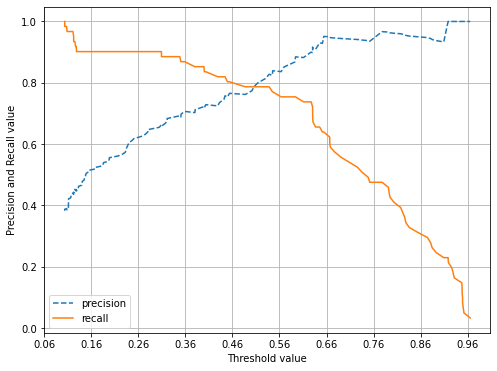

In [17]:
# precision_recall_curve() API는 정밀도와 재현율의 임곗값에 따른 값 변화를 곡선 형태의 그래프로 
# 시각화하는데 이용
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
  # threshold ndarray와 이 threshold에 따른 정밀도, 재현률 ndarray 추출
  precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

  # X축을 threshold 값으로, Y축은 정밀도, 재현률 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
  plt.figure(figsize=(8,6))
  threshold_boundary = thresholds.shape[0]
  plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
  plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')

  # threshold 값 X축의 Scale을 0.1 단위로 변경
  start, end = plt.xlim()
  plt.xticks(np.round(np.arange(start, end, 0.1),2))

  # x축, y축 label과 legend, 그리고 grid 설정
  plt.xlabel('Threshold value')
  plt.ylabel('Precision and Recall value')
  plt.legend()
  plt.grid()
  plt.show()

precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

#### 결과 해석
* 임계값이 낮을수록 많은 수의 양성 예측으로 인해 재현율 값이 극도로 높아지고 정밀도 값이 낮아짐.(FN이 작아지고 FP가 커짐)
* 로지스틱 회귀 기반의 타이타닉 생존자 예측 모델의 경우 임곗값이 약 0.5 지점에서 재현율과 정밀도가 비슷해지는 모습을 보임.
* 단순히 하나의 성능 지표 수치를 높이기 위한 수단으로 사용하는 것은 지양하고 업무 환경에 맞게 두 개의 수치를 상호 보완할 수 있는 수준에서 적용

#### 정밀도 및 재현율 활용시 유의 사항
* 정밀도와 재현율 성능 수치는 어느 한쪽만 참조하면 극단적인 수치 조작이 가능
* 정밀도 100%가 되는 방법:
  확실한 기준이 되는 경우만 Positive로 예측하고 나머지는 모두 Negative로 예측
  전체 환자 1000명중 확실한 Positive 징후만 가진 환자는 단 1명이라고 하면 이 한 명만 P로 예측하고 나머지는 모두 N으로 예측
  FP는 0, TP는 1이 되며 정밀도(TP/(TP+FP)는 1/(1+0) = 1
* 재현율이 100%가 되는 방법: 
  모든 환자를 Positive로 예측
  1000명의 환자중 실제 양성인 사람이 30명 정도라도 TN이 수치에 포함되지 않고 FN은 0이므로 재현율(TP/(TP+FN)은 30/(30+0) = 1
* 분류가 정밀도, 재현율 중 하나에 상대적인 중요도를 부여할 수 있지만 하나만 강조해서는 안됨
* 암 예측 모델에서 재현율을 높인다고 주로 양성만 판정한다면 환자의 부담과 불평이 커지게 됨

#### ROC 곡선과 AUC
* 수신자 판단 곡선이라고 하며 ML의 이진 분류 모델의 예측 성능을 판단하는 중요한 평가 지표.
* FPR이 변할 때 TPR이 어떻게 변하는지를 나타내는 곡선으로 FPR은 1- 특이성(TNR), TPR은 재현율(민감도)를 나타냄.
* TNR은 TN/(TN+FP)이며 FPR은 FP/(TN+FP)임
* ROC 곡선은 FPR을 0부터 1까지 변경하면서 FPR을 구하고 이 FPR값의 변화에 따른 TPR의 변화 값을 구함.
* FPR을 0에서 1까지 변경하는 것은 Positive 예측값을 결정하는 기준인 분류 결정 임곗값을 변경하면 됨. 
* FPR을 0으로 만들려면 임곗값을 1로 지정하고 반대로 FPR을 1로 만들려면 임곗값을 0으로 지정하면 됨.

In [19]:
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived',axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test= train_test_split(X_titanic_df, y_titanic_df,
                                                   test_size = 0.2, random_state=11)

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
accuracy_lr = accuracy_score(y_test, pred)
accuracy_lr

0.8491620111731844

In [23]:
from sklearn.metrics import roc_curve

pred_proba_c1 = lr_clf.predict_proba(X_test)[:,1]
fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
thr_index = np.arange(1, thresholds.shape[0],5)
print(np.round(thresholds[thr_index],2))
print(np.round(fprs[thr_index],2))
print(np.round(tprs[thr_index],2))

[0.97 0.65 0.63 0.56 0.45 0.4  0.35 0.15 0.13 0.11 0.11]
[0.   0.02 0.03 0.08 0.13 0.17 0.2  0.47 0.58 0.69 0.8 ]
[0.03 0.64 0.72 0.75 0.8  0.84 0.89 0.9  0.93 0.97 0.98]


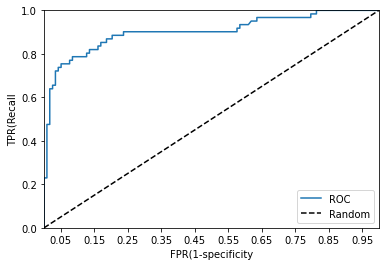

In [24]:
import matplotlib.pyplot as plt
def roc_curve_plot(y_test, pred_proba_c1):
  fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
  plt.plot(fprs, tprs, label='ROC')
  plt.plot([0,1],[0,1], 'k--', label='Random')

  start, end = plt.xlim()
  plt.xticks(np.round(np.arange(start, end, 0.1),2))
  plt.xlim(0,1)
  plt.ylim(0,1)
  plt.xlabel('FPR(1-specificity')
  plt.ylabel('TPR(Recall')
  plt.legend()
  plt.show()

roc_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

In [25]:
from sklearn.metrics import roc_auc_score

pred_proba = lr_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print(f'ROC AUC 값:{roc_score:.4f}')

ROC AUC 값:0.9024


In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

def get_clf_eval(y_test, pred, pred_proba):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)
  roc_auc = roc_auc_score(y_test, pred_proba)
  print('오차행렬')
  print(confusion)
  print(f'정확도:{accuracy:.4f}, 정밀도:{precision:.4f}, 재현률:{recall:.4f}, F1:{f1:.4f}, AUC:{roc_auc:.4f}')

get_clf_eval(y_test, pred, pred_proba)

오차행렬
[[104  14]
 [ 13  48]]
정확도:0.8492, 정밀도:0.7742, 재현률:0.7869, F1:0.7805, AUC:0.9024


#### 과제
Q. 분류기 - DT, parameters, cv=5, scoring='accuracy'를 적용하여 교차검증과 성능 개선을 위한 하이퍼파라미터 튜닝을 수행하여 최적의 모델을 생성한 후 평가하세요. 단, 평가는 분류 평가지표 모두를 포함하는 사용자 함수를 작성하여 수행  
[파라미터]  
- max_depth : [2,3,5,10]
- min_samples_split : [2,3,5]
- min_samples_leaf: [1,5,8]
    

In [28]:
from sklearn.tree import DecisionTreeClassifier 
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived',axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df,
                                                   test_size=0.2, random_state=11)

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)
pred = dt_clf.predict(X_test)
accuracy_dt = accuracy_score(y_test,pred)
accuracy_dt

0.7821229050279329

In [29]:
#  GridSearchCV : 교차검증과 성능 개선을 위한 하이퍼파라미터 튜닝을 동시에 수행
# 교차 검증을 기반으로 하이퍼 파라미터의 최적 값을 찾게 해줌
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score , \
recall_score ,confusion_matrix, f1_score, roc_auc_score

parameters = {'max_depth':[2,3,5,10], 'min_samples_split':[2,3,5],\
              'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', \
                         cv=5, refit=True)
grid_dclf.fit(X_train, y_train)
print(grid_dclf)
print('GridSearchCV 최적 하이퍼 파라미터:', grid_dclf.best_params_)
print('GridSeachCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))

best_dclf = grid_dclf.best_estimator_
print(best_dclf)
dpredictions = best_dclf.predict(X_test)
dpred_proba = best_dclf.predict_proba(X_test)[:,1]
accuracy = accuracy_score(y_test, dpredictions)
print('grid_dt 예측 정확도 :', accuracy)

def get_clf_eval(y_test , dpredictions, dpred_proba):
    confusion = confusion_matrix( y_test, dpredictions)
    accuracy = accuracy_score(y_test , dpredictions)
    precision = precision_score(y_test , dpredictions)
    recall = recall_score(y_test , dpredictions)
    f1 = f1_score(y_test,dpredictions)
    roc_auc = roc_auc_score(y_test, dpred_proba)
    print('오차 행렬')
    print(confusion)
    print()    
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
get_clf_eval(y_test , dpredictions, dpred_proba)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 5, 10],
                         'min_samples_leaf': [1, 5, 8],
                         'min_samples_split': [2, 3, 5]},
             scoring='accuracy')
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSeachCV 최고 정확도: 0.7992
DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)
grid_dt 예측 정확도 : 0.8715083798882681
오차 행렬
[[109   9]
 [ 14  47]]

정확도: 0.8715, 정밀도: 0.8393, 재현율: 0.7705,    F1: 0.8034, AUC:0.8937
